## Seasonality

In [45]:
#Import the necessary packages again
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import seaborn as sns
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [46]:
#Create a function called 'time_series_line' which can be done for simple Time Series Graphs with a line connecting each point
def line_time_series(xdata,ydata,title,xlabel,ylabel,marker='o'):
    ydata.plot()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [47]:
#Load in the datasets that have been joined in SQL so that all variables have been included
#This file is found in R_files in chapter 1 yearly cars sold as cars_sold_economic_socioeconomic_data.csv
monthly_data = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Maryland Car Sales Data/R_files/chapter 1 yearly cars sold/monthly_car_sales_all_data.csv')
#This is going to set the index to month so that you can sense of the data easier
monthly_data.set_index(monthly_data['month'],inplace=True)
#The column month remains in the dataframe so it needs to be deleted
monthly_data.drop(columns='month',inplace=True)
#The month also needs to viewed as datetime so that it can graphed as a time series
monthly_data.index = pd.to_datetime(monthly_data.index)
monthly_data

,new_cars_sold,used_cars_sold,values_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold,inflation_rate_cpi,unemployment_rate_not_sa,unemployment_rate_sa
month,,,,,,,,,
2002-01-01,31106,49927,755015820,386481929,81033,1141497749,2.6,5.5,5.0
2002-02-01,27520,50982,664454223,361353242,78502,1025807465,2.6,5.2,5.0
2002-03-01,34225,58794,805666244,419385387,93019,1225051631,2.4,5.1,5.0
2002-04-01,36452,59817,846368297,433061150,96269,1279429447,2.5,4.9,4.9
2002-06-01,36348,55415,830251613,414731166,91763,1244982779,2.3,5.1,4.8
...,...,...,...,...,...,...,...,...,...
2023-06-01,27001,50613,1214340987,814275863,77614,2028616850,4.8,1.7,2.0
2023-07-01,26360,49502,1196918451,887723892,75862,2084642343,4.7,1.7,1.8
2023-08-01,25876,52725,1222581892,908454060,78601,2131035952,4.3,1.8,1.7


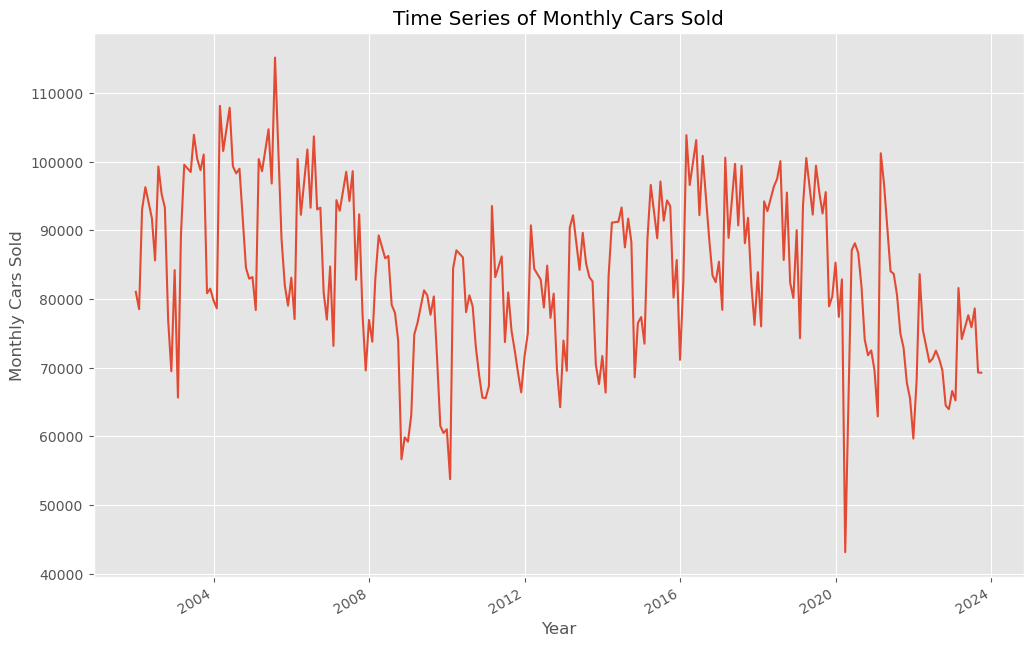

In [48]:
#Create a time series graph using the line time series to understand the seasonality that is occuring in the data
line_time_series(monthly_data.index,monthly_data['total_cars_sold'],'Time Series of Monthly Cars Sold', 'Year', 'Monthly Cars Sold')

In [49]:
def roll_mean_std_dev(df_column,window):

    #Look at the mean and the standard deviation of this data
    rolmean = df_column.rolling(window).mean()
    rolstd = df_column.rolling(window).std()

    #Let's check the stationarity of the graph
    #Plot the rolling statistics
    orig = plt.plot(df_column,color='blue',label='Original')
    mean = plt.plot(rolmean,color='red',label='Rolling Mean')
    std = plt.plot(rolstd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title(f'Rolling Mean & Standard Deviation')
    plt.show(block=False)

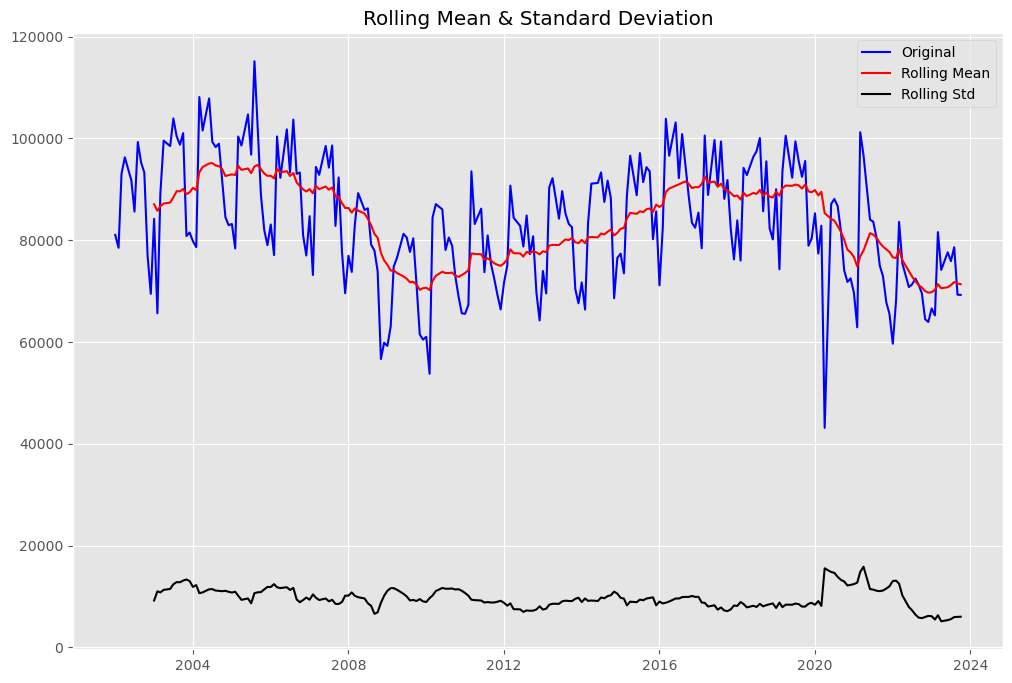

In [50]:
roll_mean_std_dev(monthly_data['total_cars_sold'], 12)

This is a similar to graph as seen in chapter 1, however it makes the seasonality of the data a little bit more clear. You can observe that there are certain periods of time where car sales seems to follow a particular trend.
In particular lets observe how the data looks at:

- 2003-2008
- 2009-2016
- 2016-2020

You can see that these time periods might some seasonal componenet to the data. Where as 2020 onwards does seem to be very heavilty impacted by external economic and socioeconomic factors which will be explored later. 

In [51]:
def spliced_data(df,time_frame_1, time_frame_2):
    spliced_df  = df[((df.index >= time_frame_1) & (df.index <= time_frame_2))]
    return spliced_df

In [52]:
time_frame_1_df = spliced_data(monthly_data,'2003-01-01','2008-01-01')
time_frame_1_df

,new_cars_sold,used_cars_sold,values_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold,inflation_rate_cpi,unemployment_rate_not_sa,unemployment_rate_sa
month,,,,,,,,,
2003-01-01,34707,49481,860730784,392438833,84188,1253169617,1.9,5.0,4.7
2003-02-01,24585,41048,615749948,323297077,65633,939047025,1.7,5.1,4.8
2003-03-01,32705,56513,791728069,413899574,89218,1205627643,1.7,5.0,4.8
2003-04-01,37682,61856,909778220,458127973,99538,1367906193,1.5,4.6,4.9
2003-06-01,38573,59904,941898387,455117890,98477,1397016277,1.5,5.3,4.9
2003-07-01,41088,62811,990041754,489374362,103899,1479416116,1.5,5.0,4.9
2003-08-01,39556,60829,985375378,460316726,100385,1445692104,1.3,4.8,4.8
2003-09-01,40464,58279,1012404987,446119525,98743,1458524512,1.2,4.5,4.8
2003-10-01,38597,62417,980365678,470520906,101014,1450886584,1.3,4.5,4.7


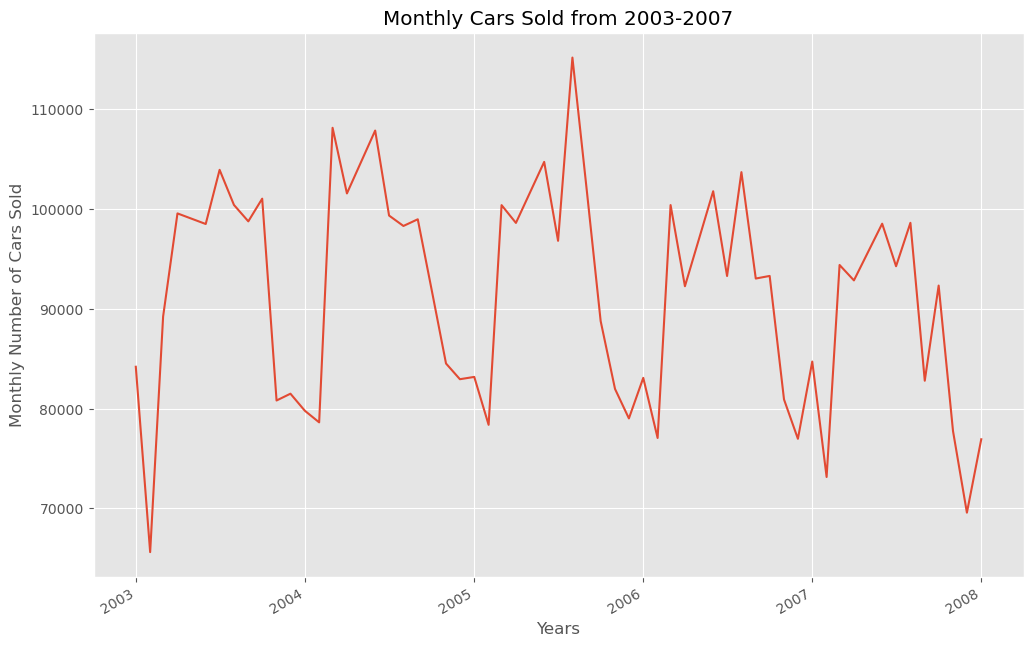

In [53]:
#Create a time series graph of the data that goes from 2003-2007
line_time_series(time_frame_1_df.index,time_frame_1_df['total_cars_sold'],'Monthly Cars Sold from 2003-2007','Years','Monthly Number of Cars Sold')

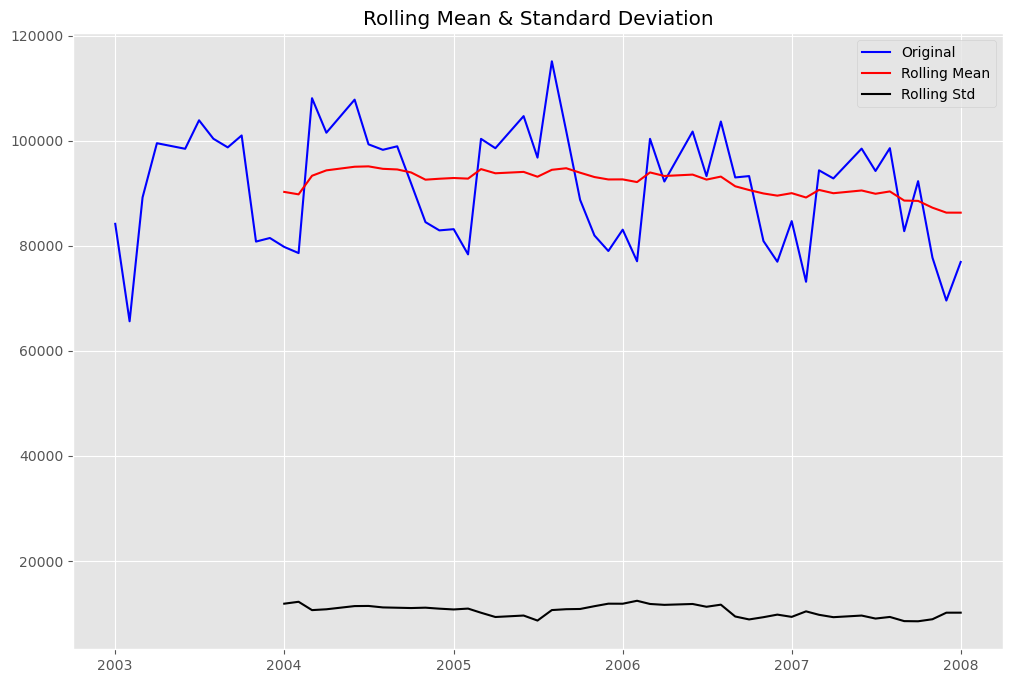

In [54]:
roll_mean_std_dev(time_frame_1_df['total_cars_sold'],12)

In [55]:
#Created a spliced dataframe of the data that goes from 2009-01-01 to 2016-01-01
time_frame_2_df = spliced_data(monthly_data,'2009-01-01','2016-01-01')
time_frame_2_df

,new_cars_sold,used_cars_sold,values_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold,inflation_rate_cpi,unemployment_rate_not_sa,unemployment_rate_sa
month,,,,,,,,,
2009-01-01,17963,41254,504208132,320520578,59217,824728710,1.7,7.1,6.6
2009-02-01,14779,48308,418843100,332054088,63087,750897188,1.8,7.5,7.0
2009-03-01,17844,56948,465300148,390527459,74792,855827607,1.8,7.5,7.3
2009-04-01,20905,55631,526701218,390447902,76536,917149120,1.9,7.0,7.5
2009-06-01,24509,56732,627433850,411152753,81241,1038586603,1.7,8.0,7.7
...,...,...,...,...,...,...,...,...,...
2015-09-01,32154,62182,1035533325,632452008,94336,1667985333,1.9,4.6,4.8
2015-10-01,30552,62954,991747766,653329361,93506,1645077127,1.9,4.7,4.7
2015-11-01,25828,54354,858213639,568019044,80182,1426232683,2.0,4.5,4.7


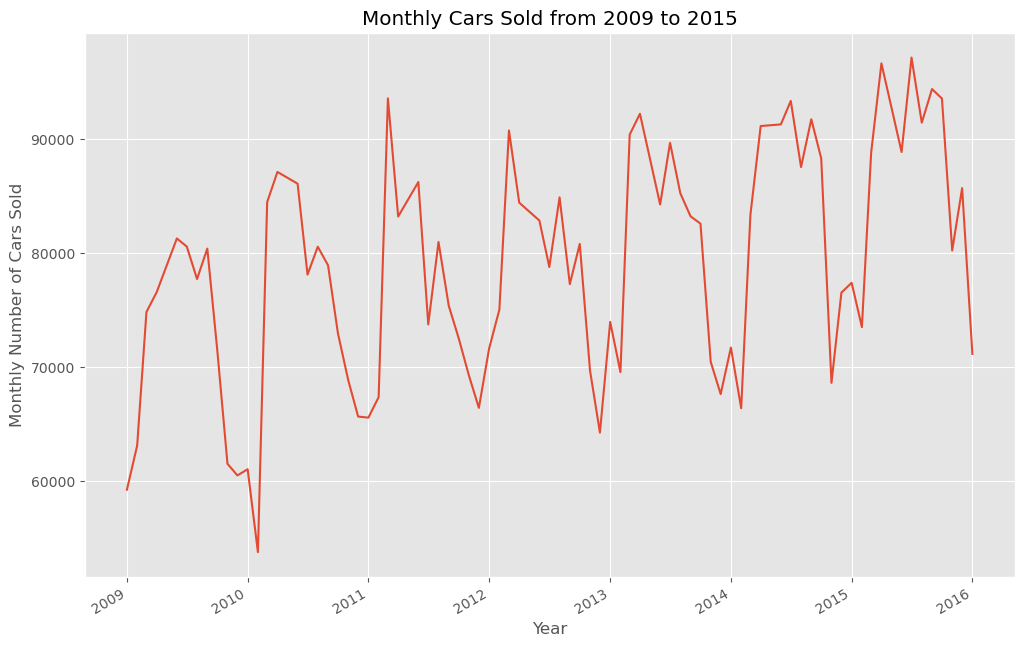

In [56]:
#Create a time series graph of the number of cars sold per month going from 2009 to 2015
line_time_series(time_frame_2_df.index,time_frame_2_df['total_cars_sold'],'Monthly Cars Sold from 2009 to 2015','Year','Monthly Number of Cars Sold')

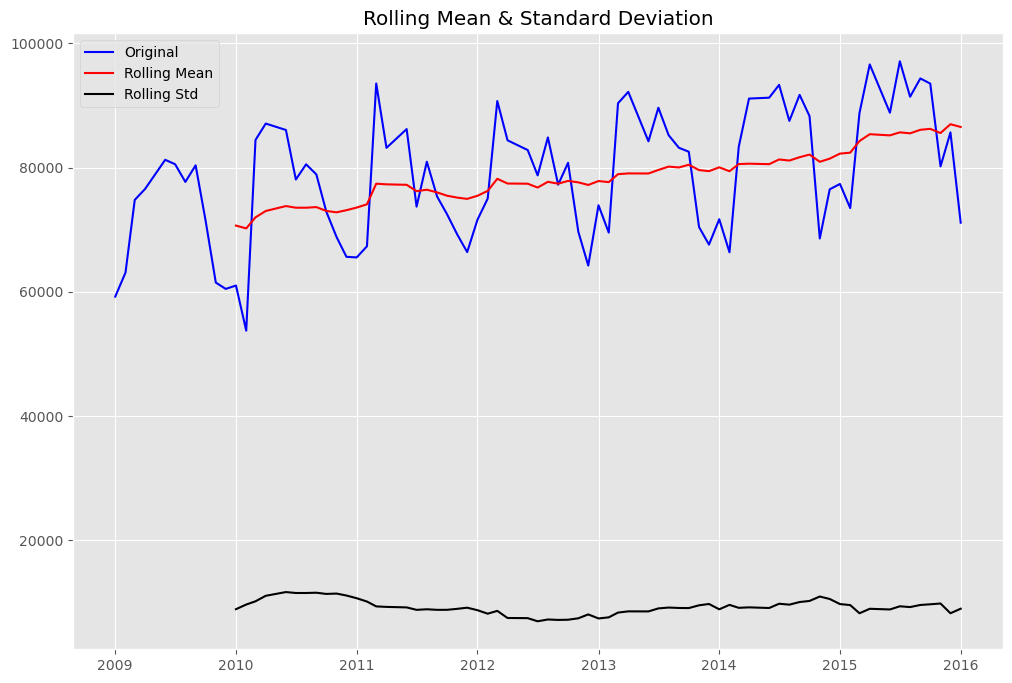

In [57]:
roll_mean_std_dev(time_frame_2_df['total_cars_sold'],12)

In [58]:
#Created a spliced dataframe of the data that goes from 2016-01-01 to 2020-01-01
time_frame_3_df = spliced_data(monthly_data,'2016-01-01','2020-01-01')
time_frame_3_df

,new_cars_sold,used_cars_sold,values_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold,inflation_rate_cpi,unemployment_rate_not_sa,unemployment_rate_sa
month,,,,,,,,,
2016-01-01,25835,45285,878106665,518918140,71120,1397024805,2.2,4.7,4.5
2016-02-01,24257,58184,813473347,581005001,82441,1394478348,2.3,4.7,4.4
2016-03-01,30675,73163,988609546,723865536,103838,1712475082,2.2,4.4,4.3
2016-04-01,29787,66793,943502901,693293383,96580,1636796284,2.1,4.0,4.3
2016-06-01,34366,68750,1094447550,751886189,103116,1846333739,2.2,4.5,4.3
2016-07-01,29636,62545,960502273,691521741,92181,1652024014,2.2,4.5,4.2
2016-08-01,29945,70887,994401467,780694327,100832,1775095794,2.3,4.4,4.2
2016-09-01,28544,66056,976643490,742588270,94600,1719231760,2.2,4.1,4.3
2016-10-01,27082,61678,907244735,685808210,88760,1593052945,2.1,4.2,4.3


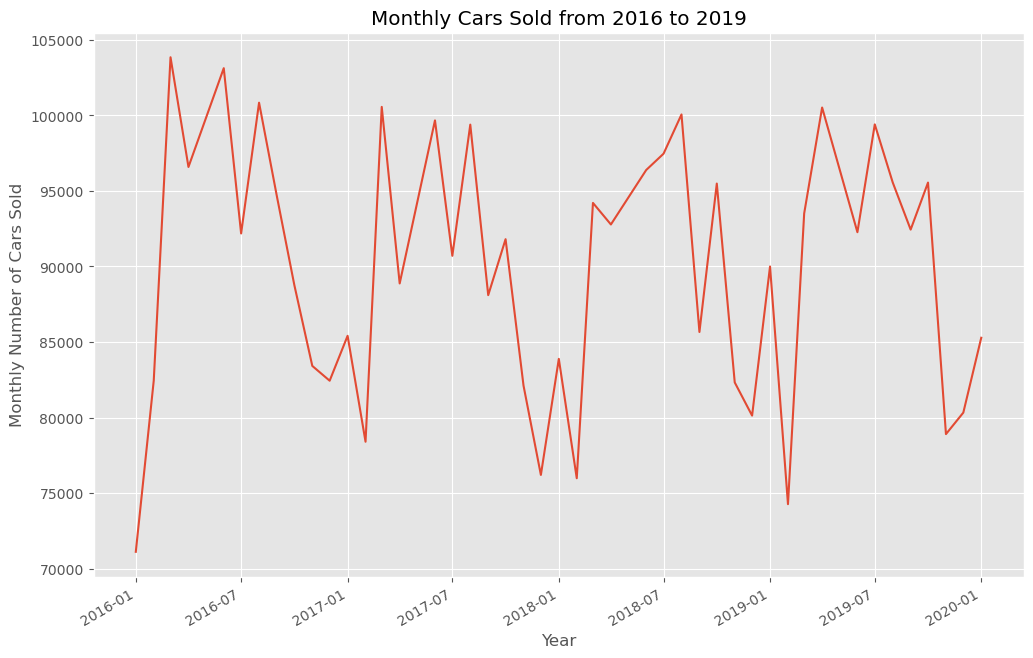

In [59]:
#Create a time series graph of the number of cars sold per month going from 2016-2019
line_time_series(time_frame_3_df.index,time_frame_3_df['total_cars_sold'],'Monthly Cars Sold from 2016 to 2019','Year','Monthly Number of Cars Sold')

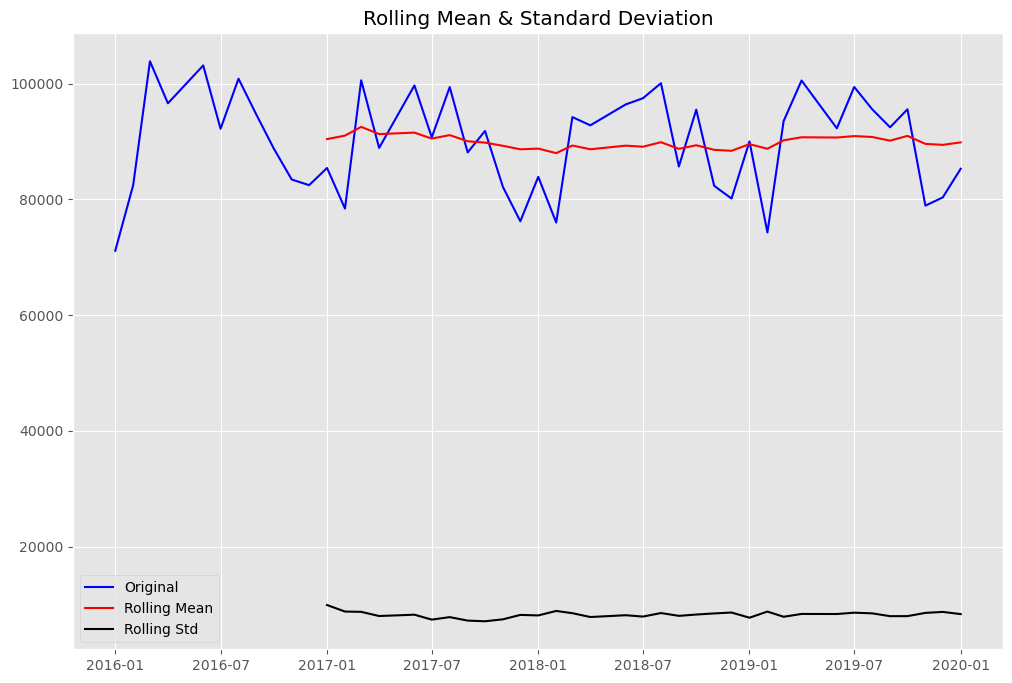

In [60]:
roll_mean_std_dev(time_frame_3_df['total_cars_sold'],12)

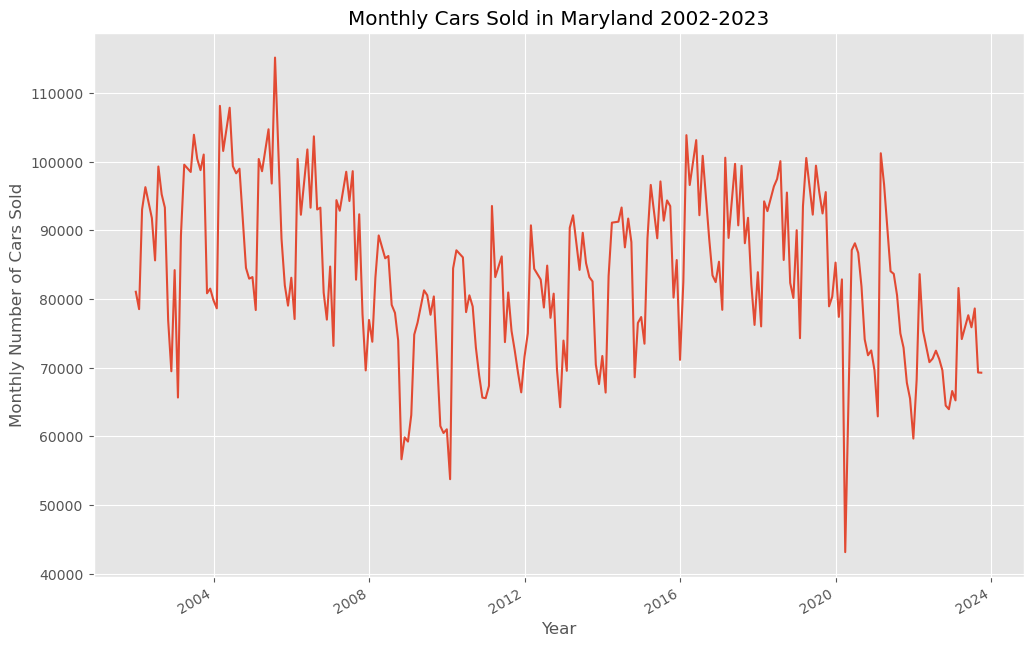

In [61]:
line_time_series(monthly_data.index,monthly_data['total_cars_sold'],'Monthly Cars Sold in Maryland 2002-2023','Year','Monthly Number of Cars Sold')

Look at the monthly number of cars sold in Maryland from 2002-2023. You can see that there is a moving mean and the standard deviation does change at certain points. Let's observe this using the rolling mean and standard deviation graph

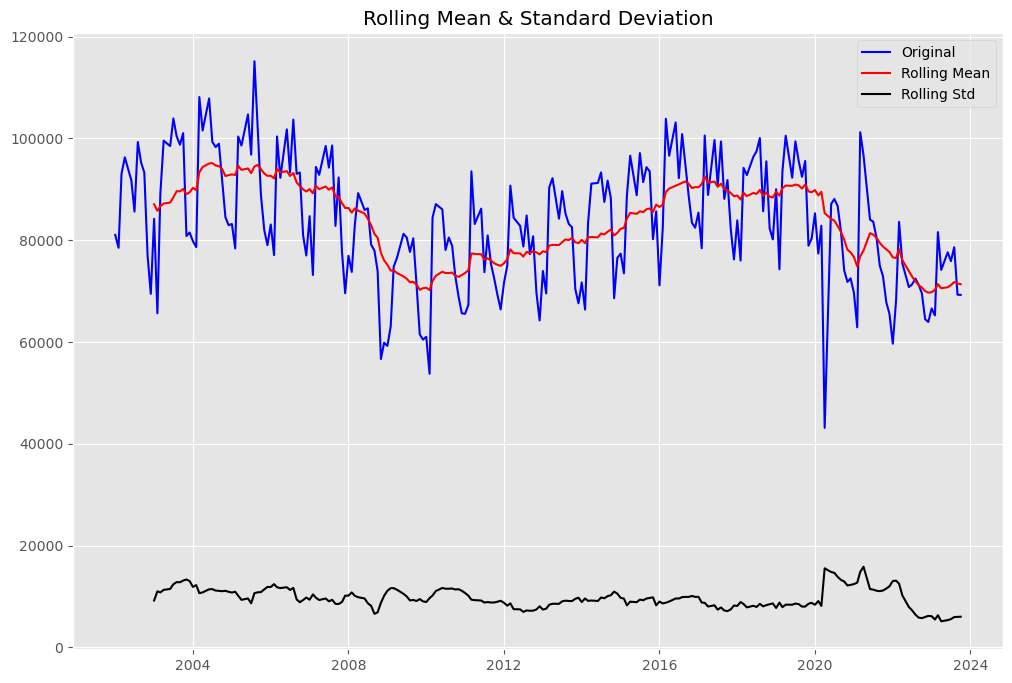

In [62]:
roll_mean_std_dev(monthly_data['total_cars_sold'],12)

You can see clearly that the mean has a downard trend from 2005 to 2009 before slowly increasing to 2018. The values then decrease from 2019 to 2023. The standard deviation remains pretty constant besides 2020 onwards where there is a massive change in standard deviation which is likely the result of covid-19 creating a lot of havoc in the car sales industry

In [63]:
monthly_data['total_cars_sold_first_difference'] = monthly_data['total_cars_sold'].diff()
monthly_data['total_cars_sold_yearly_difference'] = monthly_data['total_cars_sold'].diff(12)

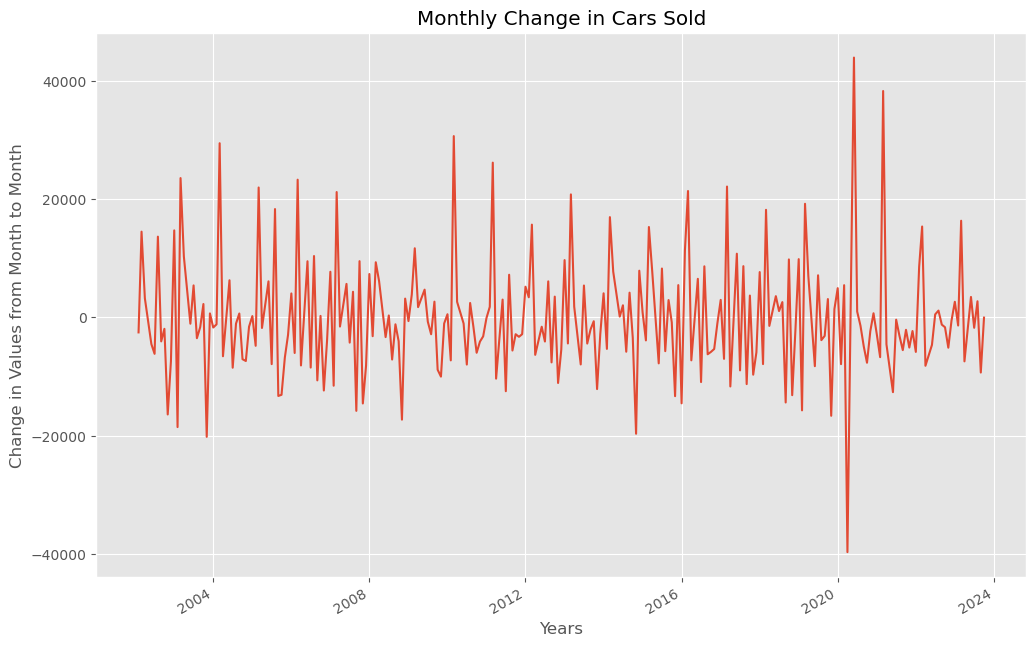

In [64]:
line_time_series(monthly_data.index,monthly_data['total_cars_sold_first_difference'],'Monthly Change in Cars Sold','Years','Change in Values from Month to Month')

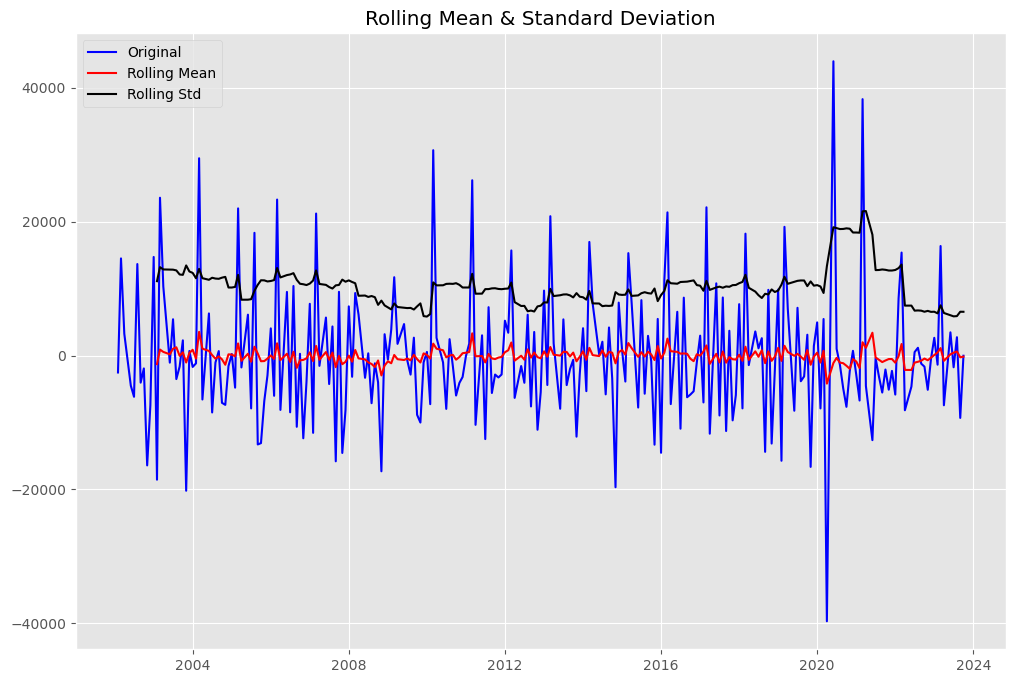

In [65]:
roll_mean_std_dev(monthly_data['total_cars_sold_first_difference'],12)

The diff() function has been applied which is meant to remove the impact of linear movement, as the new graph has a rolling mean that is very close to 0 this means that the movement that took place in the original data was linear

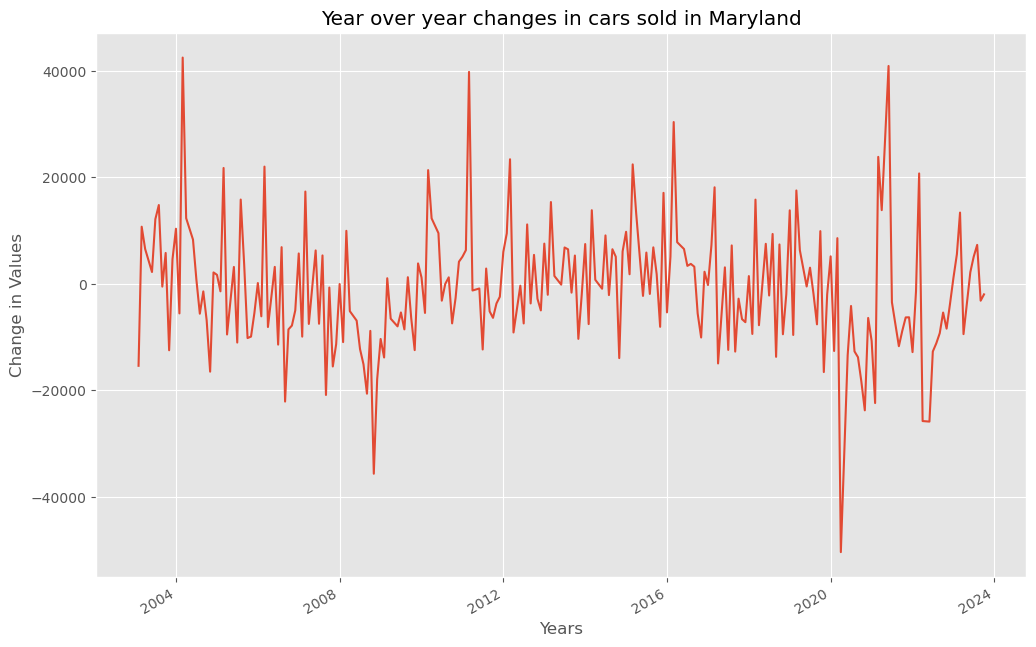

In [66]:
line_time_series(monthly_data.index,monthly_data['total_cars_sold_yearly_difference'],'Year over year changes in cars sold in Maryland','Years','Change in Values')

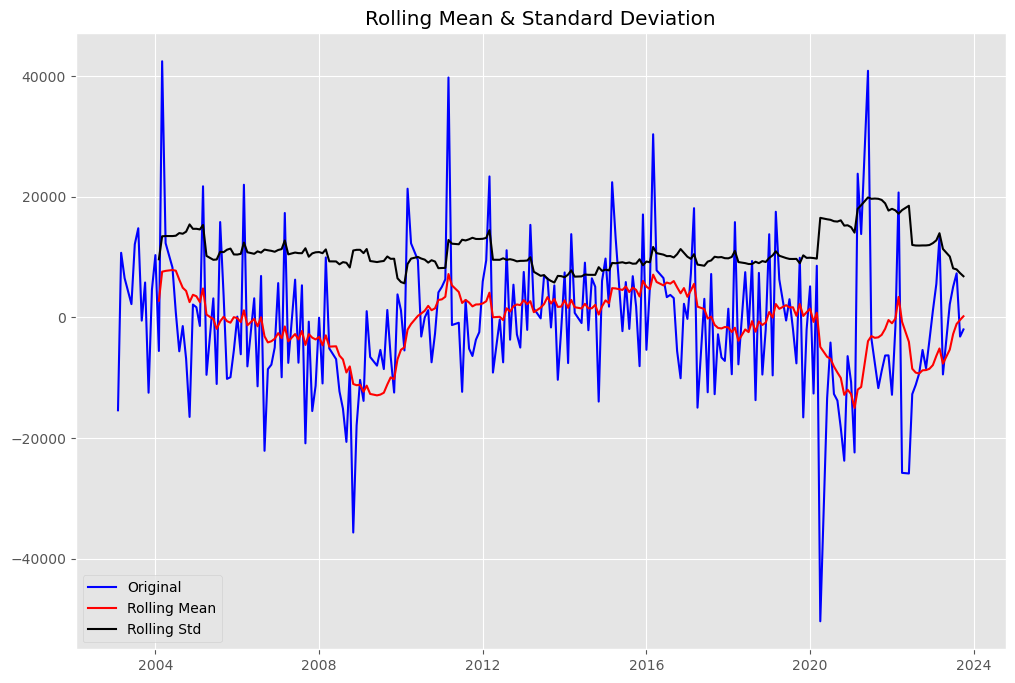

In [67]:
roll_mean_std_dev(monthly_data['total_cars_sold_yearly_difference'],12)

After applying the difference function converting the time series to a change in value 12 months previous, shows some clear patterns in the data. This means that there are other components of the data that needs to be explained. You can see that this is likely the linear trend that needs to be accounted for.

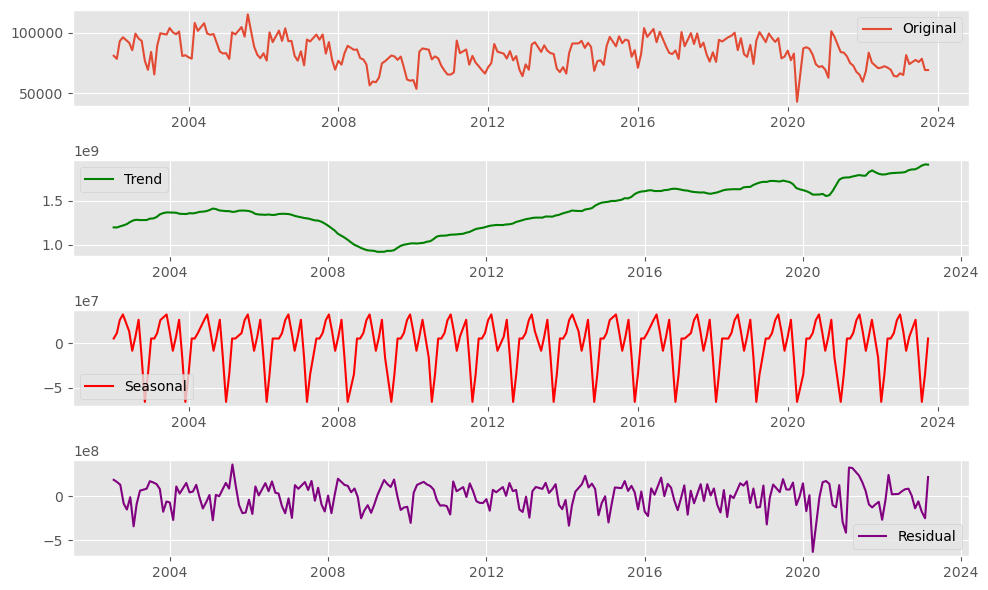

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(x=monthly_data['total_value_cars_sold'], model='additive', period=12)

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(monthly_data['total_cars_sold'], label='Original')
plt.legend()

# Plot the trend component
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend', color='green')
plt.legend()

# Plot the seasonal component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal', color='red')
plt.legend()

# Plot the residual component
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual', color='purple')
plt.legend()

plt.tight_layout()
plt.show()

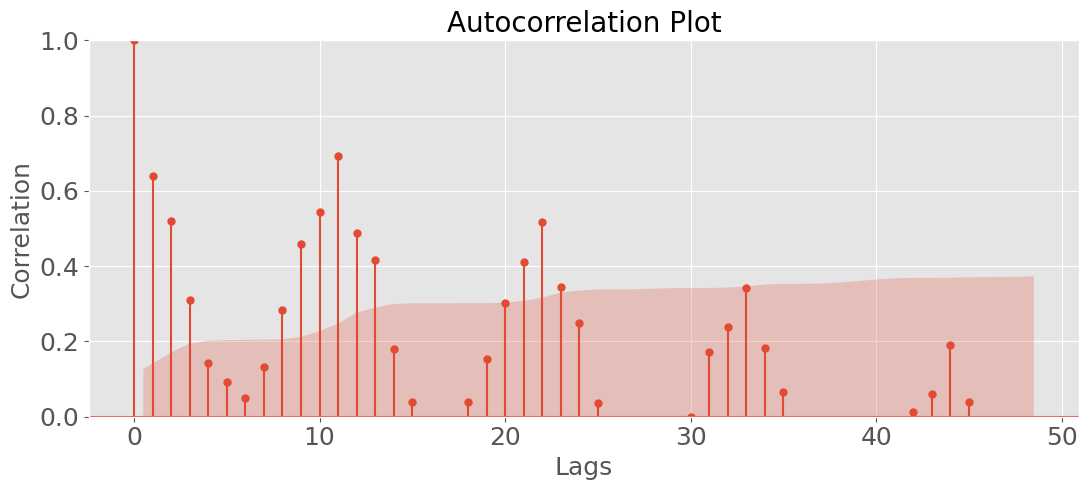

In [69]:
# Import packages
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Plot autocorrelation
plt.rc("figure", figsize=(11,5))
plot_acf(monthly_data['total_cars_sold'], lags=48)
plt.ylim(0,1)
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Autocorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()

/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


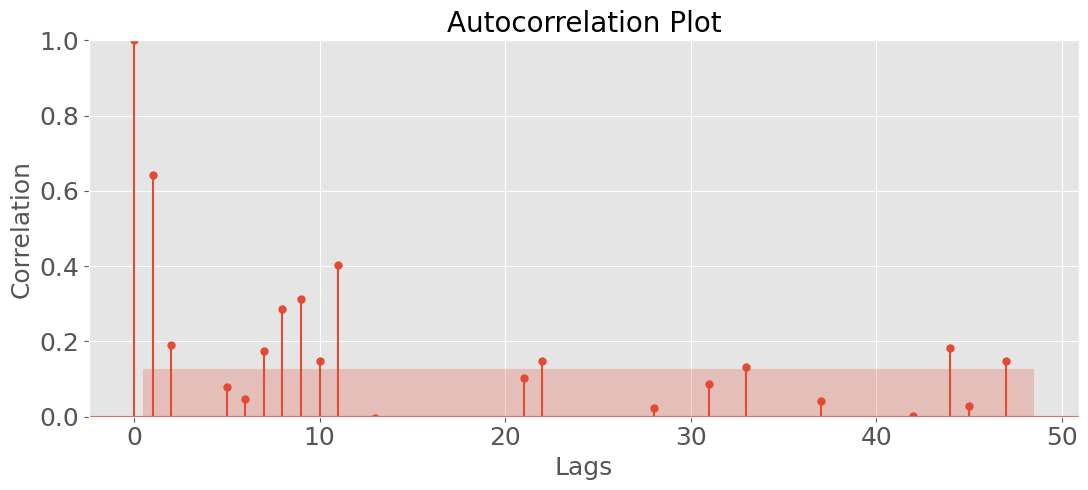

In [70]:
# Import packages
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Plot autocorrelation
plt.rc("figure", figsize=(11,5))
plot_pacf(monthly_data['total_cars_sold'], lags=48)
plt.ylim(0,1)
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Autocorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()

In [72]:
monthly_data['total_cars_sold_first_difference']

month
2002-01-01        NaN
2002-02-01    -2531.0
2002-03-01    14517.0
2002-04-01     3250.0
2002-06-01    -4506.0
               ...   
2023-06-01     3466.0
2023-07-01    -1752.0
2023-08-01     2739.0
2023-09-01    -9323.0
2023-10-01      -30.0
Name: total_cars_sold_first_difference, Length: 240, dtype: float64

In [87]:
import plotly.graph_objects as go

# Split train and test
train = monthly_data.iloc[:-int(len(monthly_data) * 0.2)]
test = monthly_data.iloc[-int(len(monthly_data) * 0.2):]


def plot_func(forecast, title):
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train.index, y=train['total_cars_sold'], name='Train'))
    fig.add_trace(go.Scatter(x=test.index, y=forecast, name='Test'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Passenger Volume')

    return fig.show()

In [88]:
test['mean_forecast'] = train['total_cars_sold_first_difference'].mean()
plot_func(test['mean_forecast'],'Average Forecast')

/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_21472/3721715250.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
# Seasonal naive forecast
train['month_number'] = pd.DatetimeIndex(train.index).month
test['month_number'] = pd.DatetimeIndex(test.index).month

snaive_fc = []
for row_idx, row in test.iterrows():
    month = row['month_number']
    forecast = train['total_cars_sold_first'] .loc[train['month_number'] == month].iloc[-1]
    snaive_fc.append(forecast)

plot_func(snaive_fc, 'Seasonal Naive Forecast')

/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_21472/2581985884.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_21472/2581985884.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
# Drift forecast
constant = (train['total_cars_sold'].iloc[-1] - train['total_cars_sold'].iloc[0])/(len(train)-1)
test['h'] = range(len(test))
test['drift_forecast'] = train['total_cars_sold'].iloc[-1] + test['h']*constant

plot_func(test['drift_forecast'], 'Drift Forecast')

/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_21472/1376863136.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_21472/1376863136.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [96]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

def plot_func(forecast: list[float], title: str) -> None:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train.index, y=train['total_cars_sold'], name='Train'))
    fig.add_trace(go.Scatter(x=test.index, y=test['total_cars_sold'], name='Test'))
    fig.add_trace(go.Scatter(x=test.index, y=forecast, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Passenger Volume')


# Fit model and get forecasts
model = SimpleExpSmoothing(train['total_cars_sold']).fit(optimized=True)
forecasts = model.forecast(len(test))



/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [97]:
# Plot the forecasts
plot_func(forecasts, 'Simple Exponential Smoothing')